# Visualizing Aircraft Data from Go-Amazon
Testing the efficacy of the clustered data methodology developed for the SGP site on the Go-Amazon data. <br>
Visualization of the flight path can also be seen in this section.

In [1]:
from scipy.io import netcdf
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import pandas as pd
import matplotlib.pyplot as plt
import statistics

import matplotlib.style

import matplotlib

matplotlib.style.use('classic')

In [2]:
import glob,os,sys
os.chdir('C:/Users/yashg/Documents/Cloud_Data_Files')

In [3]:
file='11_05_27_Aircraft.nc'
file2='Micropulse/sgp30smplcmask1zwangC1.c1.20110527.000002.nc'
file3='Ext/sgp1rlprofext1ferrC1.c0.20110527.000000.cdf'
aircraft=Dataset(file)
ext=Dataset(file2)
r=Dataset(file3)

In [5]:
ta=aircraft['Time'][:]
te=ext['time_offset'][:]
tr=r['time_offset'][:]
te2=te[te>=ta[0]]
tr2=tr[tr>=ta[0]]
cdc=aircraft['CDP_Conc'][:]

In [8]:
cdc_e=[]
for i in range(0,len(te2)):
    if i!=len(te2)-1:
        cdc_e.append([cdc[m] for m,x in enumerate(ta) if te2[i]<= x <=te2[i+1]])
    else:
        cdc_e.append([cdc[m] for m,x in enumerate(ta) if te2[i]<= x])

In [9]:
def list_red(t1,t2,cdc):
    #t1: Smaller resolution
    #t2: Larger resolution
    cdc_e=[]
    for i in range(0,len(t1)):
        if i!=len(t1)-1:
            ltemp=[cdc[m] for m,x in enumerate(t2) if t1[i]<= x <=t1[i+1]]
            ltemp=np.array(ltemp)
            ltemp=ltemp[ltemp>0]
            cdc_e.append(np.mean(ltemp))
        else:
            ltemp=[cdc[m] for m,x in enumerate(ta) if t1[i]<= x]
            ltemp=np.array(ltemp)
            ltemp=ltemp[ltemp>0]
            cdc_e.append(np.mean(ltemp))    
    return cdc_e

In [10]:
cdc_e=list_red(te2,ta,cdc)
cdc_r=list_red(tr2,ta,cdc)

C:\Users\yashg\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\yashg\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


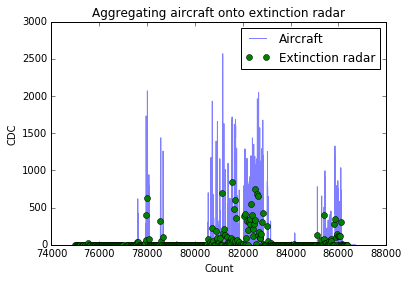

In [11]:
plt.figure(facecolor='white')
plt.plot(ta,cdc,alpha=0.5,label='Aircraft')
plt.plot(te2,cdc_e,'o',label='Extinction radar')
#plt.xlim(81000,83000)
plt.xlabel('Count')
plt.ylabel('CDC')
plt.title('Aggregating aircraft onto extinction radar')
plt.legend()
plt.show()

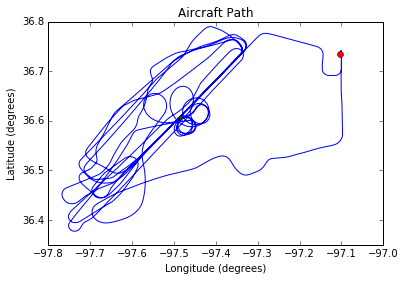

In [12]:
x=36.605
y=-97.485
plt.figure(facecolor='white')
lat=np.ma.filled(aircraft['POS_Lat'][:])
lat=lat[lat!=1000]
lon=np.ma.filled(aircraft['POS_Lon'][:])
lon=lon[lon!=10000]
plt.plot(lon,lat)
plt.plot(y,x,'*')
plt.plot(lon[:][0],lat[:][0],'o')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.title('Aircraft Path')
plt.ticklabel_format(axis='both',style='plain',useOffset=False)
plt.show()

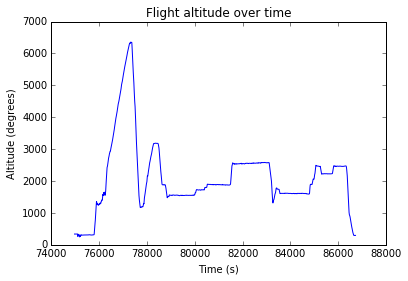

In [15]:
plt.figure(facecolor='white')
alt=np.ma.filled(aircraft['POS_Alt'])
xx=np.where(alt!=100000)
alt=alt[xx[0]]
ta=ta[xx[0]]
plt.plot(ta,alt)
plt.xlabel('Time (s)')
plt.ylabel('Altitude (degrees)')
plt.title('Flight altitude over time')
plt.show()

In [16]:
data=pd.read_csv('cdc_23072020.csv')
data2=pd.read_csv('C:/Users/yashg/Documents/Cloud_Data_Files/varying_extinction/cdc_27052011/cdc_(15.0, 50.0).csv')
data3=pd.read_csv('C:/Users/yashg/Documents/Cloud_Data_Files/newfile_19072020.csv')
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Date', 'Time', 'Height', 'LWC', 'LWC_SD',
       'Velocity', 'Velocity_SD', 'Spectral_Width', 'Spectral_Width_SD',
       'Reflectivity', 'Reflectivity_SD', 'Temperature', 'Extinction_low',
       'Extinction', 'Extinction_high', 'CCN', 'CDC_pinsky,k=0.3',
       'Smax,k=0.3', 'CDC_pinsky,k=0.4', 'Smax,k=0.4', 'CDC_pinsky,k=0.5',
       'Smax,k=0.5', 'CDC_pinsky,k=0.6', 'Smax,k=0.6', 'CDC_pinsky,k=0.7',
       'Smax,k=0.7', 'CDC_pinsky,k=0.8', 'Smax,k=0.8', 'CDC_pinsky,k=0.9',
       'Smax,k=0.9', 'CDC_pinsky,k=1.0', 'Smax,k=1.0', 'CDC_Fan',
       'CDC_Lidar_gamma_0', 'CDC_Lidar_gamma_1', 'CDC_Lidar_gamma_2',
       'CDC_Lidar_gamma_3', 'CDC_Lidar_gamma_4', 'CDC_Lidar_gamma_5',
       'CDC_Lidar_gamma_6', 'CDC_Lidar_gamma_7', 'CDC_Lidar_exp_0.35'],
      dtype='object')

(72000, 87000)

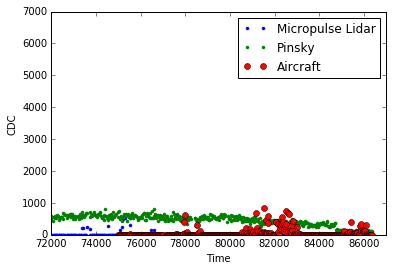

In [22]:
plt.plot(d2['Time'],d2['CDC_Lidar_gamma_2'],'.',label='Micropulse Lidar')
plt.plot(d2['Time'],d2['CDC_pinsky,k=0.5'],'.',label='Pinsky')
plt.plot(te2,cdc_e,'o',label='Aircraft')
#plt.plot(ta,cdc[1:],'.',alpha=0.5,label='Aircraft')
plt.legend()
plt.xlabel('Time')
plt.ylabel('CDC')
plt.xlim(72000,87000)

In [21]:
d2=data[data['LWC']!=data['LWC']]

In [66]:
data=pd.read_csv('newfile_15up.csv')
cdc_gamma=data['CDC_Lidar_gamma_2']
cdc_exp=data['CDC_Lidar_exp_0.35']
cdc_pinsky=data['CDC_pinsky,k=0.3']
t=data['Time']

In [209]:
import glob
li=[]
calc_files=[]
li=glob.glob('./varying_extinction/alldates/c/*.csv')
for x in li:
    if x.find('cdc')!=-1:
        calc_files.append(x)

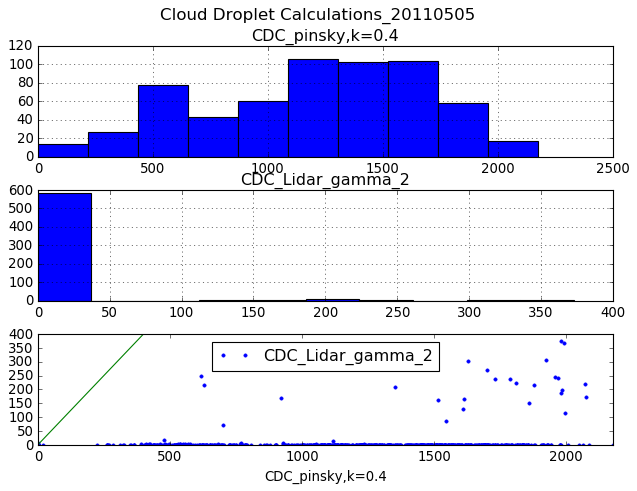

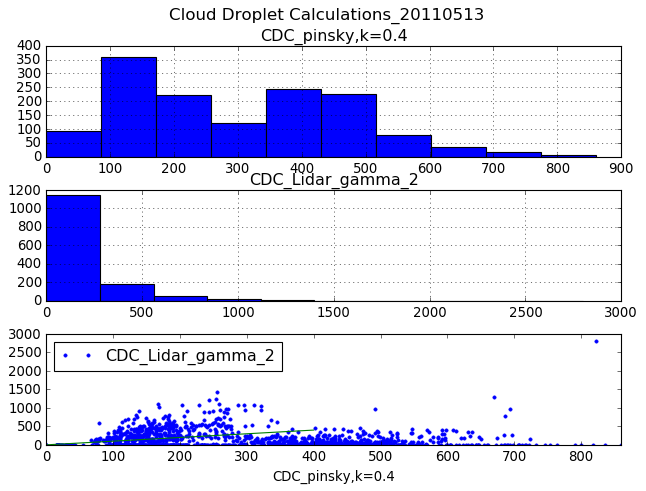

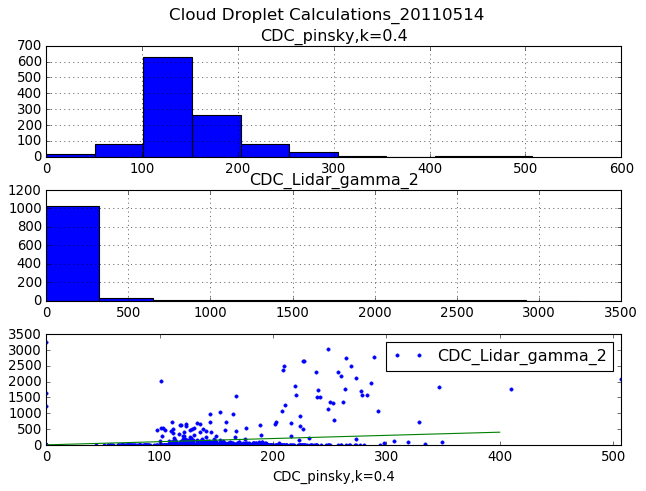

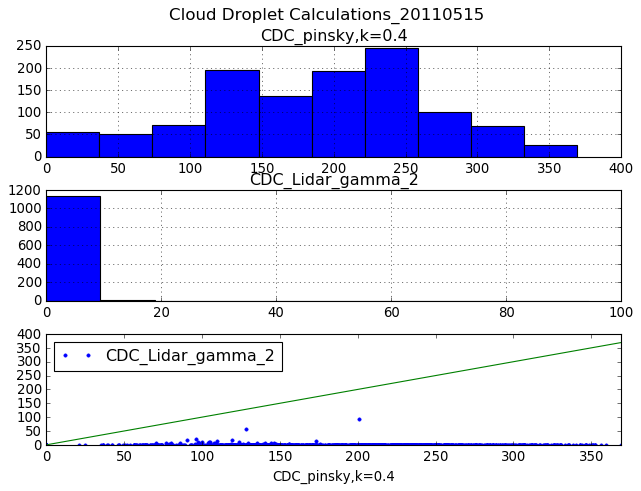

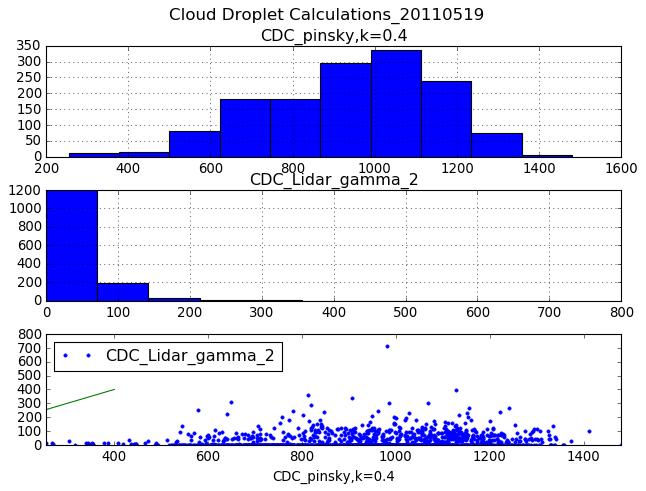

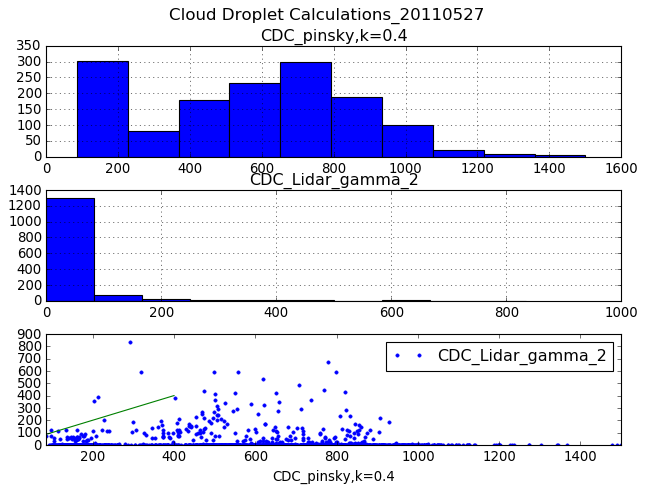

In [223]:
for file in calc_files:
    data=pd.read_csv(file)
    a1,b1=file.split('\\')
    b1=b1[:-4]
    aa,bb=b1.split('_')    
#    data=data[(data['Time']>=81000) & (data['Time']<=83000)]
    fig,axes=plt.subplots(nrows=3,ncols=1)
    fig.tight_layout()
    fig.subplots_adjust(top=0.9)
    fig.suptitle(f'Cloud Droplet Calculations_{bb}',fontsize=15)
    fig.set_facecolor('white')
    data.hist(column='CDC_pinsky,k=0.4',ax=axes[0])
    data.hist(column='CDC_Lidar_gamma_2',ax=axes[1])
    data.plot(x='CDC_pinsky,k=0.4',y='CDC_Lidar_gamma_2',style='.',ax=axes[2])
    axes[2].plot([0,400],[0,400],'-')
#    axes[2].plot(cdc_e,label='Aircraft')
#    axes[2].plot(data['CDC_pinsky,k=0.4'],label='Pinsky')
#    axes[2].plot(data['CDC_Lidar_gamma_2'],label='Lidar')
#    axes[2].set_title(f'CDC_Aircraft')
#    axes[2].set_xlim(0,300)
#    axes[2].set_ylim(0,300)
#    axes[2].legend()
    plt.savefig(f'./varying_extinction/alldates/c/layout_{bb}.png')
#    plt.show()

In [224]:
df=pd.read_csv(calc_files[-1])

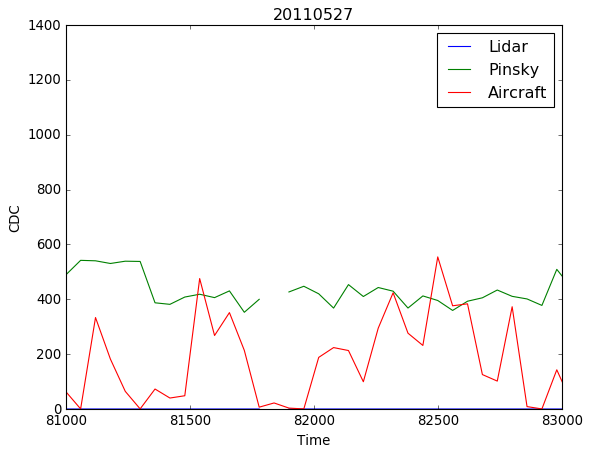

In [232]:
plt.figure(facecolor='white')
plt.plot(df['Time'],df['CDC_Lidar_gamma_2'],'-',label='Lidar')
plt.plot(df['Time'],df['CDC_pinsky,k=0.5'],'-',label='Pinsky')
plt.plot(te2,cdc_e,'-',label='Aircraft')
plt.xlim(81000,83000)
plt.xlabel('Time')
plt.ylabel('CDC')
plt.title('20110527')
plt.legend()
plt.show()